<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy.special import logit

%matplotlib inline

In [2]:
#Unregularized logistic regression

# Admission data: 
# - exam 1 score (x1) 
# - exam 2 score (x2)
# - admitted (y)
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets/data/ml-ex2/ex2data1.txt', delimiter=',')

In [3]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))

In [4]:
# LogisticRegression estimator expect an y row vector
y = y.ravel()

In [6]:
# Use 'lbfgs' solver for logistic regression as this is what Octave fminunc does.
# Parameter C ist the inverse regularization strength (high values = low regularization).
clf = LogisticRegression(C=1e9, solver='lbfgs')
clf.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

In [8]:
# Computes x2 at y = logit(0.5) from x1 and model parameters
# based on equation y = sigmoid(theta0 + theta1*x1 + theta2*x2)
# where logit is the inverse of sigmoid.
# (used for computing the linear decision boundary)
def x2(x1):
    return (logit(0.5) - theta0 - theta1*x1) / theta2

In [10]:
x1_min = X[:,0].min()
x1_max = X[:,0].max()

In [11]:
# x1 and x2 data of linear decision boundary
x1_plot = np.array([x1_min, x1_max])
x2_plot = x2(x1_plot)

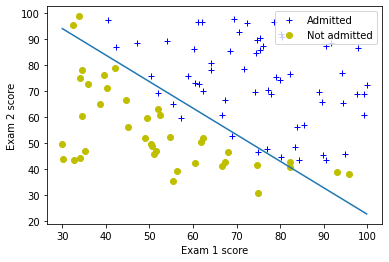

In [12]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative examples
y_pos = y == 1
y_neg = y == 0

# Plot examples and decision boundary
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Admitted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(loc='upper right')

# Plot decision boundary
ax.plot(x1_plot, x2_plot)

In [13]:
X_test = np.array([
    [45., 85.],
    [50., 50.],
    [80., 80.]
])

In [14]:
# Predict class
clf.predict(X_test)

array([1., 0., 1.])

In [15]:
# Predict class probabilities
clf.predict_proba(X_test)

array([[2.23709868e-01, 7.76290132e-01],
       [9.91642300e-01, 8.35769979e-03],
       [5.78239123e-04, 9.99421761e-01]])

In [16]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

In [17]:
theta0, theta1, theta2

(-25.16138567101979, 0.20623222395628096, 0.20147190519771885)

In [18]:
# Classification accuracy on training set
clf.score(X, y)

0.89

In [19]:
#Regularized logistic regression

# Microchip test: 
# - test 1 (x1) 
# - test 2 (x2)
# - accepted=1, rejected=0 (y)
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets/data/ml-ex2/ex2data2.txt', delimiter=',')

In [20]:
# LogisticRegression estimator expect an y row vector
X, y = np.hsplit(data, np.array([2]))

In [21]:
# Logistic regression estimator requires an y row vector
y = y.ravel()

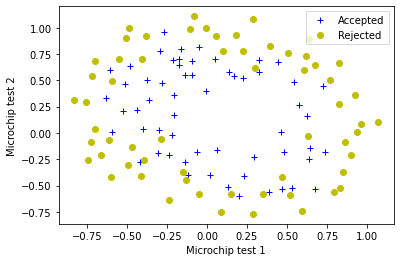

In [22]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative examples
y_pos = y == 1
y_neg = y == 0

# Plot examples
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Accepted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Rejected')
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
ax.legend(loc='upper right')

In [23]:
# Preprocessor to include polynomial features up to degree 6
poly = PolynomialFeatures(6, include_bias=False)

# Mean and standard deviation scaler
scaler = StandardScaler()

# Logistic regression classifier. 
# - C=1.0 will result in good fit
# - C=1e4 will result in overfit (to little regularization)
# - C=1e-2 will result in underfit (to much regularization)
clf = LogisticRegression(C=1.0, solver='lbfgs')

# Pipeline of polynomial feature generator, feature scaler and linear regressor
model = Pipeline([('poly', poly), ('scaler', scaler), ('clf', clf)])

# Fit data to model
model.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=6, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [24]:
# Classification accuracy on training set
model.score(X, y)

0.8305084745762712

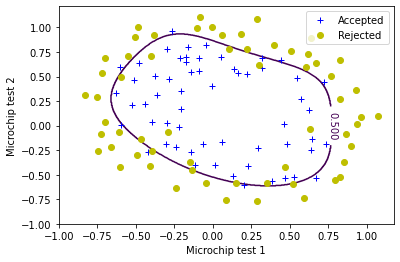

In [25]:
grid = np.mgrid[-1:1:500j, -1:1:500j]

# Compute acceptance probabilities on 500*500 grid 
X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

# Plot decision boundary on previous figure
cs = ax.contour(grid[0], grid[1], y_grid, 'g-', levels=[0.5])
ax.clabel(cs)

# Show previous figure with decision boundary
fig